In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

## Descriptive Statistics of Sales Price

In [4]:
Ames = pd.read_csv('AmesHousing.csv')
sales_price_description = Ames['SalePrice'].describe()
print(sales_price_description)

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [5]:
median_saleprice = Ames['SalePrice'].median()
print("Median Sale Price:", median_saleprice)

mode_saleprice = Ames['SalePrice'].mode().values[0]
print("Mode Sale Price:", mode_saleprice)

Median Sale Price: 160000.0
Mode Sale Price: 135000


In [6]:
range_saleprice = Ames['SalePrice'].max() - Ames['SalePrice'].min()
print("Range of Sale Price:", range_saleprice)

variance_saleprice = Ames['SalePrice'].var()
print("Variance of Sale Price:", variance_saleprice)

std_dev_saleprice = Ames['SalePrice'].std()
print("Standard Deviation of Sale Price:", std_dev_saleprice)

iqr_saleprice = Ames['SalePrice'].quantile(0.75) - Ames['SalePrice'].quantile(0.25)
print("IQR of Sale Price:", iqr_saleprice)

Range of Sale Price: 742211
Variance of Sale Price: 6381883615.6884365
Standard Deviation of Sale Price: 79886.692356665
IQR of Sale Price: 84000.0


In [7]:
skewness_saleprice = Ames['SalePrice'].skew()
print("Skewness of Sale Price:", skewness_saleprice)

kurtosis_saleprice = Ames['SalePrice'].kurt()
print("Kurtosis of Sale Price:", kurtosis_saleprice)

tenth_percentile = Ames['SalePrice'].quantile(0.10)
ninetieth_percentile = Ames['SalePrice'].quantile(0.90)
print("10th Percentile:", tenth_percentile)
print("90th Percentile:", ninetieth_percentile)

q1_saleprice = Ames['SalePrice'].quantile(0.25)
q2_saleprice = Ames['SalePrice'].quantile(0.50)
q3_saleprice = Ames['SalePrice'].quantile(0.75)
print("Q1 (25th Percentile):", q1_saleprice)
print("Q2 (Median/50th Percentile):", q2_saleprice)
print("Q3 (75th Percentile):", q3_saleprice)

Skewness of Sale Price: 1.7435000757376466
Kurtosis of Sale Price: 5.118899951130896
10th Percentile: 105450.00000000001
90th Percentile: 281241.69999999995
Q1 (25th Percentile): 129500.0
Q2 (Median/50th Percentile): 160000.0
Q3 (75th Percentile): 213500.0


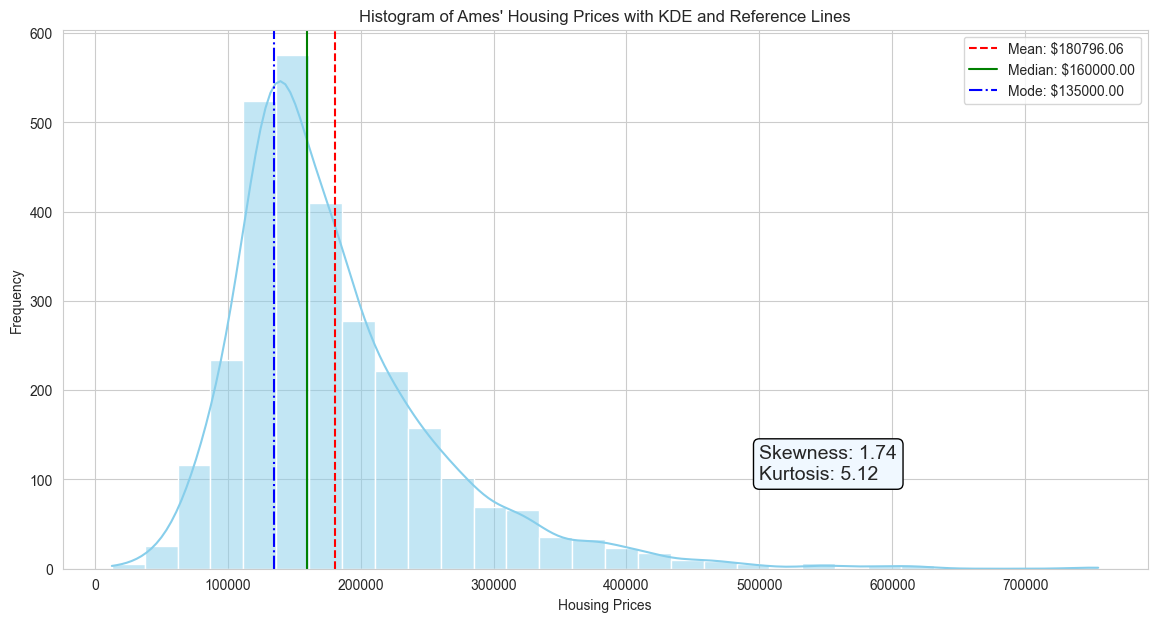

In [8]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style
sns.set_style("whitegrid")

# Calculate Mean, Median, Mode for SalePrice
mean_saleprice = Ames['SalePrice'].mean()
median_saleprice = Ames['SalePrice'].median()
mode_saleprice = Ames['SalePrice'].mode().values[0]

# Plotting the histogram
plt.figure(figsize=(14, 7))
sns.histplot(x=Ames['SalePrice'], bins=30, kde=True, color="skyblue")
plt.axvline(mean_saleprice, color='r', linestyle='--', label=f"Mean: ${mean_saleprice:.2f}")
plt.axvline(median_saleprice, color='g', linestyle='-', label=f"Median: ${median_saleprice:.2f}")
plt.axvline(mode_saleprice, color='b', linestyle='-.', label=f"Mode: ${mode_saleprice:.2f}")

# Calculating skewness and kurtosis for SalePrice
skewness_saleprice = Ames['SalePrice'].skew()
kurtosis_saleprice = Ames['SalePrice'].kurt()

# Annotations for skewness and kurtosis
plt.annotate('Skewness: {:.2f}\nKurtosis: {:.2f}'.format(Ames['SalePrice'].skew(), Ames['SalePrice'].kurt()),
             xy=(500000, 100), fontsize=14, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))

plt.title('Histogram of Ames\' Housing Prices with KDE and Reference Lines')
plt.xlabel('Housing Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()

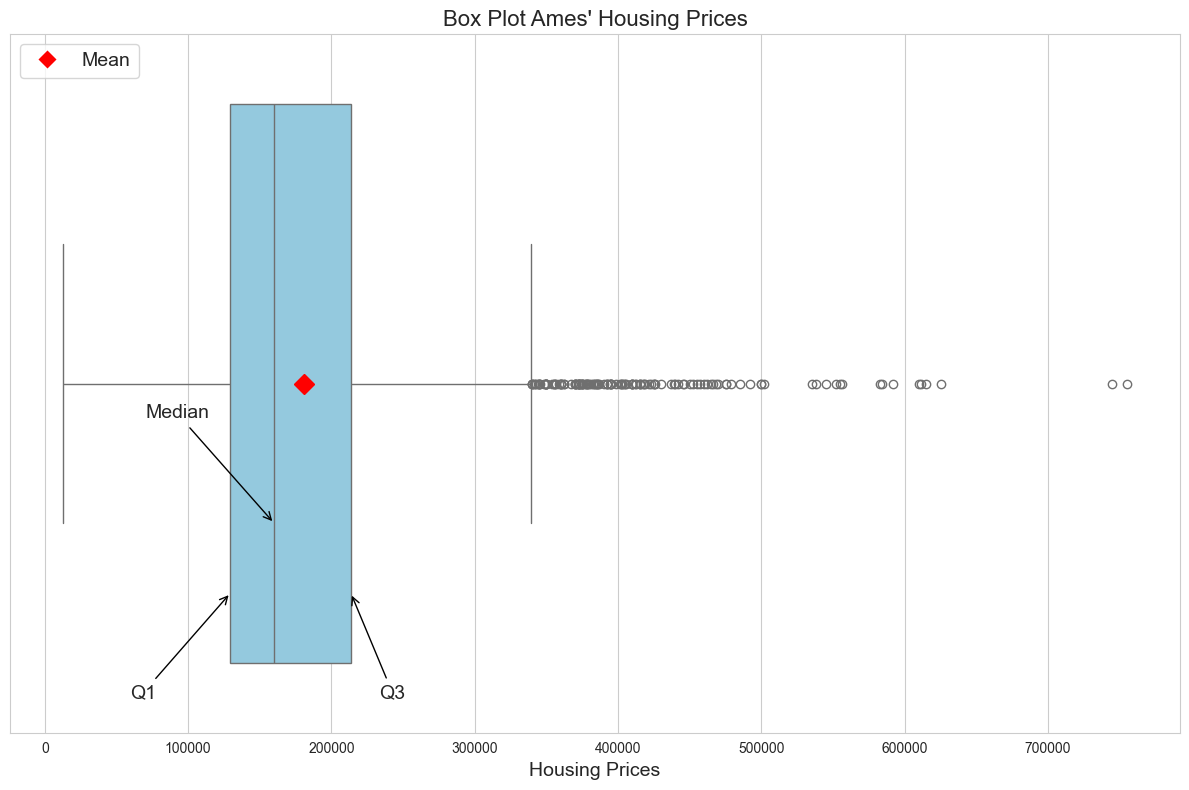

In [11]:
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Box plot
sns.boxplot(x=Ames['SalePrice'], color='skyblue', showmeans=True, meanprops={"marker": "D", "markerfacecolor": "red",
                                                                             "markeredgecolor": "red", "markersize": 10})

# Annotations
annotations = [('Q1', q1_saleprice, -70000), ('Q3', q3_saleprice, 20000), ('Median', q2_saleprice, -90000)]
for label, x, x_offset in annotations:
    plt.annotate(label, xy=(x, 0.30 if label != 'Median' else 0.20), xytext=(x + x_offset, 0.45 if label != 'Median' else 0.05),
                 arrowprops=dict(edgecolor='black', arrowstyle='->'), fontsize=14)

# Titles, labels, and legends
plt.title('Box Plot Ames\' Housing Prices', fontsize=16)
plt.xlabel('Housing Prices', fontsize=14)
plt.yticks([])

plt.legend(handles=[Line2D([0], [0], marker='D', color='w', markerfacecolor='red', markersize=10, label='Mean')],
           loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()